# 3.1 **Fully Connected Networks**

In [3]:
# importing the libraries
import tensorflow
import keras

# importing data from load_data module and some libs
from keras.datasets.mnist import load_data 
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential

# the load_data() will return two tuples of the form X, y
(X_train, y_train), (X_test, y_test) = load_data()

# rescaling the dataset and flattening the dataset
X_train = X_train.reshape(-1, 784).astype("float32") / 255.0
X_test = X_test.reshape(-1, 784).astype("float32") / 255.0

In [4]:
# importing the layers of Neural Network
from keras.layers import Input, Dense

# defining the model sequentially
autoencoder = Sequential([
    Dense(64, input_shape=(784,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(784, activation='tanh')
])

# compiling the model with proper optimizer and mse
autoencoder.compile(optimizer='adam', loss='mse')

# summary of the model
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 105392 (411.69 KB)
Trainable params: 105392 (411.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# defining the instance of the model

history = autoencoder.fit(X_train, X_train, epochs=25, batch_size=64)

Epoch 1/25
938/938 [==============================] - 2s 2ms/step - loss: 0.0361
Epoch 2/25
938/938 [==============================] - 2s 2ms/step - loss: 0.0272
Epoch 3/25
938/938 [==============================] - 2s 2ms/step - loss: 0.0257
Epoch 4/25
938/938 [==============================] - 2s 2ms/step - loss: 0.0242
Epoch 5/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0232
Epoch 6/25
938/938 [==============================] - 3s 3ms/step - loss: 0.0226
Epoch 7/25
938/938 [==============================] - 4s 4ms/step - loss: 0.0221
Epoch 8/25
938/938 [==============================] - 2s 3ms/step - loss: 0.0217
Epoch 9/25
938/938 [==============================] - 2s 2ms/step - loss: 0.0212
Epoch 10/25
938/938 [==============================] - 2s 3ms/step - loss: 0.0209
Epoch 11/25
938/938 [==============================] - 2s 2ms/step - loss: 0.0207
Epoch 12/25
938/938 [==============================] - 1s 1ms/step - loss: 0.0205
Epoch 13/25
938/938 [====

In [6]:
# evaluating the model

test_loss = autoencoder.evaluate(X_test, X_test)
print("Test Reconstruction Loss:", test_loss)


313/313 [==============================] - 0s 1ms/step - loss: 0.0186
Test Reconstruction Loss: 0.018571820110082626


1/1 [==============================] - 0s 57ms/step


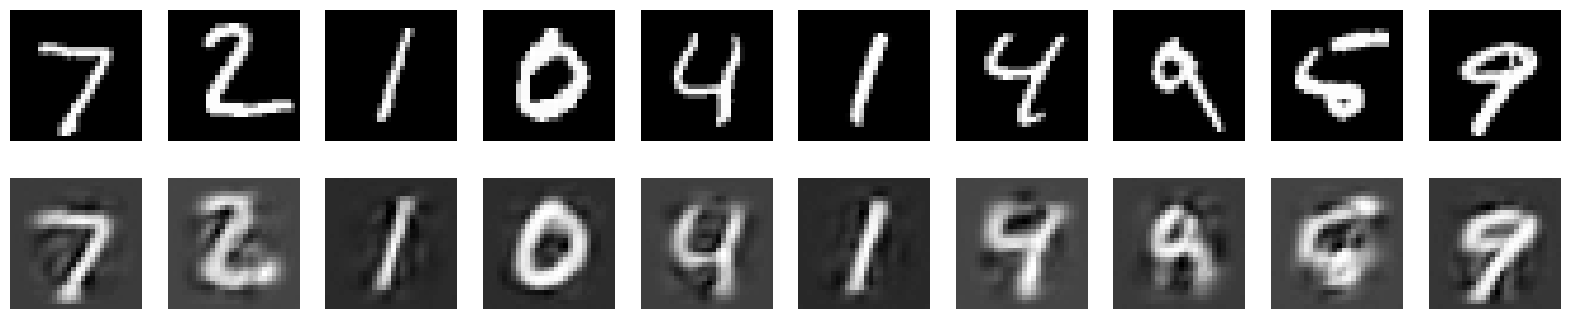

In [ ]:
# predicting the model and plotting the predicted mnist

decoded = autoencoder.predict(X_test[:10])
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))

for i in range(10):
    # original
    ax = plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # reconstructed
    ax = plt.subplot(2, 10, i+1+10)
    plt.imshow(decoded[i].reshape(28,28), cmap="gray")
    plt.axis("off")
plt.show()